In [1]:
# mlp for multi-output regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense

In [2]:
import pandas as pd
import numpy as np

In [3]:
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

%matplotlib inline

In [4]:
coreDataSynthetic=pd.read_csv('CoredataTmax.csv')

In [5]:
coreDataSynthetic.head()

,Well,CRC Lib #,Formation,Sample Type,GR,ILD,Porosity,HCl Reaction,Avg. Depth,Leco TOC (%),S1,S2,S3,Tmax (°C),HI,OI,S1+S2,PI
0,Buffalo Gap Federal 35-1,T120,MWRY,core,230.484523,11.470472,9.500998,1,11145.1,0.55,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,Buffalo Gap Federal 35-1,T120,MWRY,core,230.484523,11.470472,9.500998,1,11145.1,0.55,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,Buffalo Gap Federal 35-1,T120,MWRY,core,230.484523,11.470472,9.500998,1,11145.1,0.55,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,Buffalo Gap Federal 35-1,T120,MWRY,core,230.484523,11.470472,9.500998,1,11145.1,0.55,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,Buffalo Gap Federal 35-1,T120,MWRY,core,230.484523,11.470472,9.500998,1,11145.1,0.55,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [6]:
coreDataSynthetic.columns

Index(['Well', 'CRC Lib #', 'Formation', 'Sample Type', 'GR', 'ILD',
       'Porosity', 'HCl Reaction', 'Avg. Depth', 'Leco TOC (%)', 'S1 ', 'S2 ',
       'S3', 'Tmax (°C)', 'HI', 'OI', 'S1+S2', 'PI'],
      dtype='object')

In [7]:
data=coreDataSynthetic[['GR','ILD','Porosity','Avg. Depth','Tmax (°C)','PI']]

In [8]:
data.dropna(inplace=True)

<ipython-input-8-f1116dacf2bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [9]:
data=data[data['Porosity']<31]
data=data[(data['Avg. Depth']>7000)&(data['ILD']<400)]
data.reset_index(inplace=True)

In [10]:
X=data.drop(['Tmax (°C)','PI'],axis=1)
y=data[['Tmax (°C)','PI']]

In [11]:
X

,index,GR,ILD,Porosity,Avg. Depth
0,10,113.312000,6.419200,20.160000,10557.2
1,15,123.569200,9.876200,17.310000,10677.4
2,17,143.963500,4.226100,8.480000,10162.0
3,19,117.457600,9.061900,20.760000,10690.7
4,20,113.312000,6.419200,20.160000,10557.2
...,...,...,...,...,...
9199,9995,105.054811,9.725226,10.592800,9227.0
9200,9996,113.135171,51.706493,9.700599,11170.0
9201,9997,157.069571,30.067157,9.500998,11343.2
9202,9998,144.028221,49.117105,7.704591,11255.5


In [12]:
X=X.drop('index',axis=1)

In [13]:
scaler = preprocessing.StandardScaler()

In [14]:
X

,GR,ILD,Porosity,Avg. Depth
0,113.312000,6.419200,20.160000,10557.2
1,123.569200,9.876200,17.310000,10677.4
2,143.963500,4.226100,8.480000,10162.0
3,117.457600,9.061900,20.760000,10690.7
4,113.312000,6.419200,20.160000,10557.2
...,...,...,...,...
9199,105.054811,9.725226,10.592800,9227.0
9200,113.135171,51.706493,9.700599,11170.0
9201,157.069571,30.067157,9.500998,11343.2
9202,144.028221,49.117105,7.704591,11255.5


In [15]:
X=scaler.fit_transform(X)
y=scaler.fit_transform(y)

In [16]:
y

array([[ 0.08160265, -0.99521568],
       [ 0.10209917, -0.63489213],
       [-0.08236951, -0.33462251],
       ...,
       [ 0.20458177,  1.64715702],
       [ 0.20458177,  0.62624029],
       [ 0.18408525,  1.64715702]])

In [177]:
# get the model
def get_model(n_inputs, n_outputs):
	model = Sequential()
	model.add(Dense(30, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
	model.add(Dense(n_outputs))
	model.compile(loss='mae', optimizer='adam')
	return model

In [178]:
X

array([[-0.86667229, -0.39456515,  1.14127572, -0.21350504],
       [-0.56593609, -0.33824032,  0.62227993, -0.05377213],
       [ 0.03201503, -0.43029728, -0.9856965 , -0.73868344],
       ...,
       [ 0.41627877, -0.00926946, -0.7997689 ,  0.83100465],
       [ 0.03391261,  0.30111096, -1.12690145,  0.71446075],
       [ 0.53320024, -0.00926946, -0.7997689 ,  0.63937831]])

In [179]:
# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X, y):
	results = list()
	n_inputs, n_outputs = X.shape[1], y.shape[1]
	# define evaluation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	# enumerate folds
	for train_ix, test_ix in cv.split(X):
		# prepare data
		X_train, X_test = X[train_ix], X[test_ix]
		y_train, y_test = y[train_ix], y[test_ix]
		# define model
		model = get_model(n_inputs, n_outputs)
		# fit model
		model.fit(X_train, y_train, verbose=0, epochs=100)
		# evaluate model on test set
		mae = model.evaluate(X_test, y_test, verbose=0)
		# store result
		print('>%.3f' % mae)
		results.append(mae)
	return results
 

In [180]:
# evaluate model
results = evaluate_model(X, y)

>0.170
>0.146
>0.165
>0.147
>0.166
>0.155
>0.167
>0.171
>0.161
>0.151
>0.157
>0.135
>0.170
>0.154
>0.162
>0.180
>0.180
>0.167
>0.165
>0.147
>0.158
>0.178
>0.150
>0.176
>0.161
>0.149
>0.151
>0.149
>0.172
>0.172


### Model optimization

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [182]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=42)

In [183]:
n_inputs, n_outputs = X.shape[1], y.shape[1]
# get model
model = get_model(n_inputs, n_outputs)
# fit the model on all data
model.fit(X_train, y_train, verbose=0, epochs=100)

In [184]:
X_test.shape

(1841, 4)

In [185]:
y_pred_r=model.predict(X_test)

In [186]:
y_pred_r

array([[ 0.03541607, -0.955929  ],
       [ 0.23834822,  1.2163637 ],
       [ 0.09819614, -0.87428   ],
       ...,
       [ 0.10783661, -0.9465235 ],
       [ 0.19060516,  1.094973  ],
       [ 0.17152151,  1.0239174 ]], dtype=float32)

In [187]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    
   

print_metrics(y_test, y_pred_r, 4)

Mean Square Error      = 0.5778882564390799
Root Mean Square Error = 0.7601896187393511
Mean Absolute Error    = 0.16059986005578342
Median Absolute Error  = 0.03700193932579926
R^2                    = 0.4537427185764142
Adjusted R^2           = 0.4528506272077311


In [188]:
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(results), std(results)))

MAE: 0.161 (0.011)


In [42]:
X.shape

(2736, 4)

In [236]:
y=data[['Tmax (°C)','PI']]
y=np.array(y)
y

array([[4.44e+02, 2.00e-02],
       [4.45e+02, 8.00e-02],
       [4.36e+02, 1.30e-01],
       ...,
       [4.50e+02, 4.60e-01],
       [4.50e+02, 2.90e-01],
       [4.49e+02, 4.60e-01]])

In [18]:
import matplotlib as mpl

## Radom Forest and Multioutput regression for Tmax and PI

<ipython-input-21-78fc6835db5a>:70: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('Tmax.png',bbox_inches='tight',dpi=300, quality=99)


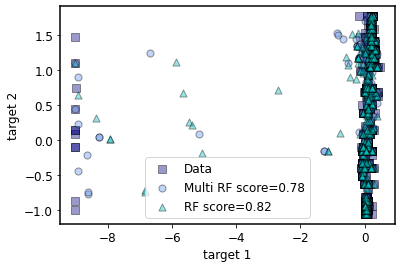

In [21]:
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# Create a random dataset
rng = np.random.RandomState(1)
# = np.sort(200 * rng.rand(600, 1) - 100, axis=0)
# = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
# += 0.5 - rng.rand(*y.shape)

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.1, random_state=42)

max_depth = 30
regr_multirf = MultiOutputRegressor(
    RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=0)
)
regr_multirf.fit(X_train, y_train)

regr_rf = RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=2)
regr_rf.fit(X_train, y_train)

# Predict on new data
y_multirf = regr_multirf.predict(X_test)
y_rf = regr_rf.predict(X_test)

# Plot the results
plt.figure()
s = 50
a = 0.4
plt.scatter(
    y_test[:, 0],
    y_test[:, 1],
    edgecolor="k",
    c="navy",
    s=s,
    marker="s",
    alpha=a,
    label="Data",
)
plt.scatter(
    y_multirf[:, 0],
    y_multirf[:, 1],
    edgecolor="k",
    c="cornflowerblue",
    s=s,
    alpha=a,
    label="Multi RF score=%.2f" % regr_multirf.score(X_test, y_test),
)
plt.scatter(
    y_rf[:, 0],
    y_rf[:, 1],
    edgecolor="k",
    c="c",
    s=s,
    marker="^",
    alpha=a,
    label="RF score=%.2f" % regr_rf.score(X_test, y_test),
)

plt.xlabel("target 1")
plt.ylabel("target 2")
#plt.title("Comparing random forests and the multi-output meta estimator")
plt.legend()
plt.savefig('Tmax.png',bbox_inches='tight',dpi=300, quality=99)
plt.show()


In [235]:
y_test

,Tmax (°C),PI
76,447.0,0.03
5281,451.0,0.39
2087,445.0,0.04
582,450.0,0.42
93,441.0,0.02
...,...,...
3165,440.0,0.03
103,442.0,0.02
1175,450.0,0.12
2006,450.0,0.41


In [191]:
y_multirf.shape

(921, 2)

In [192]:
y_test[:,1].max()

1.7672648708517853

In [193]:
y_test[:,1].min()

-1.0552696068282728

### Model evaluation

#### Multi output meta estimator

In [194]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   

print_metrics(y_test, y_multirf, 4)

Mean Square Error      = 0.22320810859043924
Root Mean Square Error = 0.47244905396290005
Mean Absolute Error    = 0.05084838667211716
Median Absolute Error  = 8.465450562766819e-16
R^2                    = 0.775775835792399
Adjusted R^2           = 0.7750422780032792


### Random forest regression 

In [195]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   

print_metrics(y_test, y_rf, 4)

Mean Square Error      = 0.18351856928215302
Root Mean Square Error = 0.42839067366383343
Mean Absolute Error    = 0.05575865770946762
Median Absolute Error  = 9.298117831235686e-16
R^2                    = 0.8157897153316505
Adjusted R^2           = 0.8151870644548729


In [196]:
lm = regr_multirf
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=10)
scores.mean()

0.8605595071568019

In [197]:
lm = regr_rf
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=10)
scores.mean()

0.8523400834116674

In [229]:
scores

array([0.90799403, 0.82254511, 0.71872241, 0.88585871, 0.95333927,
       0.85376457, 0.81583523, 0.87976809, 0.7762023 , 0.90937113])

In [198]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 5))}]


# step-3: perform grid search
# 3.1 specify model
lm = regr_rf
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 4 candidates, totalling 40 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=RFE(estimator=RandomForestRegressor(max_depth=30,
                                                           random_state=2)),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4]}],
             return_train_score=True, scoring='r2', verbose=1)

In [199]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,2.317107,0.051696,0.015960,0.002186,1,{'n_features_to_select': 1},0.790121,0.903349,0.839680,0.870564,...,0.872356,0.868272,0.867121,0.895495,0.870188,0.869848,0.864077,0.865950,0.872098,0.009186
1,1.953305,0.098888,0.019157,0.002265,2,{'n_features_to_select': 2},0.821950,0.882741,0.895070,0.889785,...,0.929059,0.933663,0.932735,0.935832,0.932212,0.934218,0.929981,0.931617,0.933336,0.002831
2,1.478011,0.071754,0.020350,0.002930,3,{'n_features_to_select': 3},0.823229,0.872887,0.910538,0.866884,...,0.937554,0.943341,0.941134,0.944247,0.941867,0.942433,0.937684,0.940765,0.942155,0.003048
3,0.847775,0.053566,0.022240,0.002531,4,{'n_features_to_select': 4},0.824302,0.883005,0.885500,0.876401,...,0.955497,0.956173,0.957404,0.957885,0.956936,0.958648,0.952739,0.954513,0.957191,0.002699


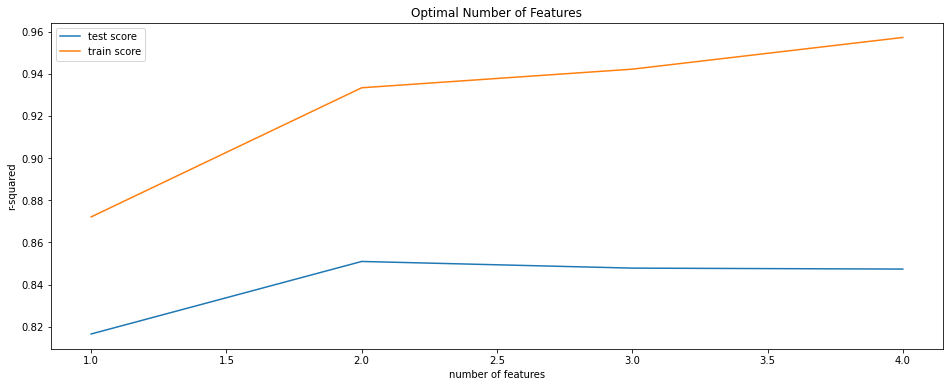

In [200]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [202]:
# final model
n_features_optimal = 4

lm1 = regr_rf
lm1.fit(X_train, y_train)

rfe1 = RFE(lm1, n_features_to_select=n_features_optimal)             
rfe1 = rfe1.fit(X_train, y_train)


y_pred1 = lm.predict(X_test)
r21 = sklearn.metrics.r2_score(y_test, y_pred1)
print(r21)

0.8157897153316505


### Grid Search with Cross Validation

In [203]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 30, 40, 50],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [0, 2, 4],
    'n_estimators': [600, 800, 1500, 2000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [204]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


C:\Users\eobasi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
288 fits failed out of a total of 864.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
288 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\eobasi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eobasi\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\eobasi\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\eobasi\Anaconda3\lib\site-pac

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 600}

In [205]:
best_grid = grid_search.best_estimator_


In [206]:
best_grid 

RandomForestRegressor(max_depth=30, max_features=3, n_estimators=600)

In [207]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} %.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [208]:
grid_accuracy = evaluate(best_grid,X_test, y_test)

Model Performance
Average Error: 0.0557 %.
Accuracy = 110.13%.


In [209]:
y_pred_r=best_grid.predict(X_test)

In [210]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))

print_metrics(y_test, y_pred_r, 4)

Mean Square Error      = 0.1864651341425772
Root Mean Square Error = 0.43181608833226354
Mean Absolute Error    = 0.05573386314948158
Median Absolute Error  = 4.010680676458378e-15
R^2                    = 0.812816170078472
Adjusted R^2           = 0.8122037911365259


# Multi-Output Model with Tensorflow keras Functional API

In [174]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [175]:
pip install keras 

Note: you may need to restart the kernel to use updated packages.


In [211]:
# Importing the libraries
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split


In [213]:
data.drop('index',axis=1,inplace=True)

In [300]:
data

,GR,ILD,Porosity,Avg. Depth,Tmax (°C),PI
0,113.312000,6.419200,20.160000,10557.2,444.00,0.02
1,123.569200,9.876200,17.310000,10677.4,445.00,0.08
2,143.963500,4.226100,8.480000,10162.0,436.00,0.13
3,117.457600,9.061900,20.760000,10690.7,443.00,0.03
4,113.312000,6.419200,20.160000,10557.2,444.00,0.02
...,...,...,...,...,...,...
9199,105.054811,9.725226,10.592800,9227.0,0.11,0.18
9200,113.135171,51.706493,9.700599,11170.0,450.00,0.48
9201,157.069571,30.067157,9.500998,11343.2,450.00,0.46
9202,144.028221,49.117105,7.704591,11255.5,450.00,0.29


In [301]:
# Split the data into train and test with 80 train / 20 test
train, test = train_test_split(data, test_size=0.2, random_state = 1)
train, val = train_test_split(train, test_size=0.2, random_state = 1)


In [302]:
# Helper functions
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

def format_output(data):
    y1 = data.pop('Tmax (°C)')
    y1 = np.array(y1)
    y1=(y1-np.mean(y1))/np.std(y1)
    y2 = data.pop('PI')
    y2 = np.array(y2)
    y2=(y2-np.mean(y2))/np.std(y2)
    return y1, y2

In [303]:
# Get Y1 and Y2 as the 2 outputs and format them as np arrays
# PI- production index
train_stats = train.describe()
train_stats.pop('Tmax (°C)')
train_stats.pop('PI')
train_stats = train_stats.transpose()
train_Y = format_output(train)
test_Y = format_output(test)
val_Y = format_output(val)

In [304]:
# Normalize the training and test data
norm_train_X = np.array(norm(train))
norm_test_X = np.array(norm(test))
norm_val_X = np.array(norm(val))

In [305]:
def build_model():
    # Define model layers.
    input_layer = Input(shape=(len(train .columns),))
    first_dense = Dense(units='128', activation='relu')(input_layer)
    # Y1 output will be fed from the first dense
    y1_output = Dense(units='1', name='Tmax_output')(first_dense)

    second_dense = Dense(units='128', activation='relu')(first_dense)
    # Y2 output will be fed from the second dense
    y2_output = Dense(units='1', name='PI_output')(second_dense)

    # Define the model with the input layer and a list of output layers
    model = Model(inputs=input_layer, outputs=[y1_output, y2_output])

    return model

In [307]:
model = build_model()

# Specify the optimizer, and compile the model with loss functions for both outputs
optimizer = tf.keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=optimizer,
              loss={'Tmax_output': 'mse', 'PI_output': 'mse'},
              metrics={'Tmax_output': tf.keras.metrics.RootMeanSquaredError(),
                       'PI_output': tf.keras.metrics.RootMeanSquaredError()})

In [308]:
# Train the model for 200 epochs
history = model.fit(norm_train_X, train_Y,
                    epochs=100, batch_size=10, validation_data=(norm_test_X, test_Y))

Epoch 1/100
589/589 [==============================] - 2s 2ms/step - loss: 1.5450 - Tmax_output_loss: 1.0212 - PI_output_loss: 0.5239 - Tmax_output_root_mean_squared_error: 1.0105 - PI_output_root_mean_squared_error: 0.7238 - val_loss: 1.2566 - val_Tmax_output_loss: 0.9861 - val_PI_output_loss: 0.2705 - val_Tmax_output_root_mean_squared_error: 0.9930 - val_PI_output_root_mean_squared_error: 0.5201
Epoch 2/100
589/589 [==============================] - 1s 2ms/step - loss: 1.2327 - Tmax_output_loss: 0.9892 - PI_output_loss: 0.2436 - Tmax_output_root_mean_squared_error: 0.9946 - PI_output_root_mean_squared_error: 0.4935 - val_loss: 1.1844 - val_Tmax_output_loss: 0.9679 - val_PI_output_loss: 0.2165 - val_Tmax_output_root_mean_squared_error: 0.9838 - val_PI_output_root_mean_squared_error: 0.4653
Epoch 3/100
589/589 [==============================] - 1s 2ms/step - loss: 1.1904 - Tmax_output_loss: 0.9804 - PI_output_loss: 0.2100 - Tmax_output_root_mean_squared_error: 0.9902 - PI_output_root_m

In [309]:
# Test the model and print loss and rmse for both outputs
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=norm_val_X, y=val_Y)

print()
print(f'loss: {loss}')
print(f'Tmax_loss: {Y1_loss}')
print(f'PI_loss: {Y2_loss}')
print(f'Tmax_rmse: {Y1_rmse}')
print(f'PI_rmse: {Y2_rmse}')

47/47 [==============================] - 0s 1ms/step - loss: 0.9312 - Tmax_output_loss: 0.8364 - PI_output_loss: 0.0948 - Tmax_output_root_mean_squared_error: 0.9146 - PI_output_root_mean_squared_error: 0.3079

loss: 0.9312143921852112
Tmax_loss: 0.8364405035972595
PI_loss: 0.09477365761995316
Tmax_rmse: 0.914571225643158
PI_rmse: 0.3078533113002777


In [310]:
def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

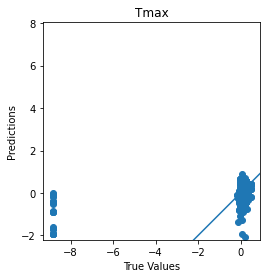

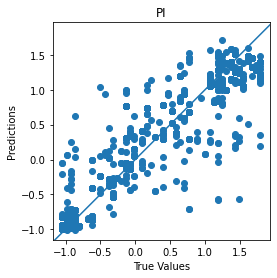

In [311]:
# Run predict
Y_pred = model.predict(norm_test_X)
price_pred = Y_pred[0]
ptratio_pred = Y_pred[1]

plot_diff(test_Y[0], Y_pred[0], title='Tmax')
plot_diff(test_Y[1], Y_pred[1], title='PI')

In [312]:
def plot_metrics1(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0.9, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

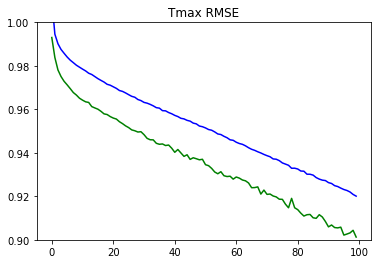

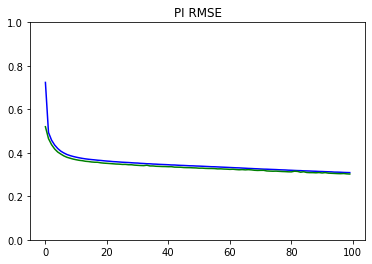

In [318]:
# Plot RMSE
plot_metrics1(metric_name='Tmax_output_root_mean_squared_error', title='Tmax RMSE',ylim=1.0)
plot_metrics(metric_name='PI_output_root_mean_squared_error', title='PI RMSE', ylim=1)

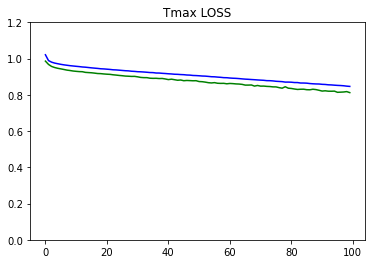

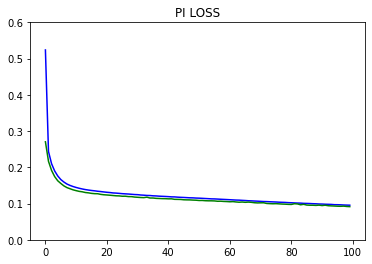

In [323]:
# Plot loss
plot_metrics(metric_name='Tmax_output_loss', title='Tmax LOSS', ylim=1.2)
plot_metrics(metric_name='PI_output_loss', title='PI LOSS', ylim=0.6)

In [47]:
train_stats

,GR,ILD,Porosity,Avg. Depth,Tmax (°C),PI
count,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000
mean,143.806626,31.313746,13.901927,10706.628657,440.253503,0.182834
std,33.179701,63.028174,5.497715,732.592466,47.628065,0.165555
min,31.991913,2.571900,5.607974,8364.000000,0.070000,0.010000
25%,127.805315,9.806300,8.480000,10607.800000,441.000000,0.030000
50%,142.788603,17.120700,12.720000,10649.700000,444.000000,0.130000
75%,157.683500,28.973155,19.100000,11183.900000,450.000000,0.360000
max,267.666300,380.210596,28.940000,12679.500000,463.000000,0.480000


In [48]:
train_stats.transpose()

,count,mean,std,min,25%,50%,75%,max
GR,1750.0,143.806626,33.179701,31.991913,127.805315,142.788603,157.683500,267.666300
ILD,1750.0,31.313746,63.028174,2.571900,9.806300,17.120700,28.973155,380.210596
Porosity,1750.0,13.901927,5.497715,5.607974,8.480000,12.720000,19.100000,28.940000
Avg. Depth,1750.0,10706.628657,732.592466,8364.000000,10607.800000,10649.700000,11183.900000,12679.500000
Tmax (°C),1750.0,440.253503,47.628065,0.070000,441.000000,444.000000,450.000000,463.000000
PI,1750.0,0.182834,0.165555,0.010000,0.030000,0.130000,0.360000,0.480000


In [230]:
import pickle

In [239]:
filename='Tmax_PI1.sav'
pickle.dump(regr_rf,open(filename,'wb'))

In [324]:
y_predictions=model.predict(norm_test_X)

In [325]:
y_predictions

[array([[ 0.01051672],
        [-0.08806721],
        [ 0.36558375],
        ...,
        [ 0.03207631],
        [ 0.06979439],
        [-0.00174955]], dtype=float32),
 array([[-0.94597137],
        [-0.90989643],
        [-0.3650254 ],
        ...,
        [-0.93232095],
        [-0.89801896],
        [-0.04650116]], dtype=float32)]

In [297]:
first=y_predictions[0]
second=y_predictions[1]

In [327]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    #r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    #print('Adjusted R^2           = ' + str(r2_adj))
   

print_metrics(test_Y[0], y_predictions[0], 4)

Mean Square Error      = 0.8122691562120343
Root Mean Square Error = 0.9012597606750422
Mean Absolute Error    = 0.24420883501141355
Median Absolute Error  = 0.09635873995495436
R^2                    = 0.18773084378796567


## saving TOC Model

In [240]:
model.save('./PowderRiverSweetspots1/', save_format='tf')


INFO:tensorflow:Assets written to: ./PowderRiverSweetspots/assets


In [241]:
loaded_model = tf.keras.models.load_model('./PowderRiverSweetspots/')

In [243]:
# Run predict with restored model
predictions = loaded_model.predict(norm_test_X)
Tmax_pred = predictions[0]
PI_pred = predictions[1]

In [244]:
Tmax_pred 

array([[ 0.00813064],
       [-0.11706318],
       [ 0.3859629 ],
       ...,
       [-0.02391331],
       [ 0.12691142],
       [-0.05316591]], dtype=float32)

In [245]:
PI_pred

array([[-0.96920043],
       [-0.8733179 ],
       [-0.2536039 ],
       ...,
       [-0.90727717],
       [-0.89308727],
       [-0.13365468]], dtype=float32)

In [258]:
scaler.inverse_transform(Tmax_pred.reshape(-1,4))

ValueError: cannot reshape array of size 1841 into shape (4)

In [253]:
np.info(predictions)

Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.


In [332]:
anothermethod=data.drop(['PI','Tmax (°C)'],axis=1)

In [333]:
anothermethod

,GR,ILD,Porosity,Avg. Depth
0,113.312000,6.419200,20.160000,10557.2
1,123.569200,9.876200,17.310000,10677.4
2,143.963500,4.226100,8.480000,10162.0
3,117.457600,9.061900,20.760000,10690.7
4,113.312000,6.419200,20.160000,10557.2
...,...,...,...,...
9199,105.054811,9.725226,10.592800,9227.0
9200,113.135171,51.706493,9.700599,11170.0
9201,157.069571,30.067157,9.500998,11343.2
9202,144.028221,49.117105,7.704591,11255.5


In [336]:
X=scaler.fit_transform(anothermethod)
y=data['Tmax (°C)']

In [335]:
from xgboost import XGBRegressor

In [337]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=42)

In [338]:
eval_set = [(X_test, y_test)]

In [350]:
modelXgb = XGBRegressor()

In [351]:
modelXgb.fit(X_train, y_train,eval_metric="error",eval_set=eval_set,verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [352]:
y_predictions=modelXgb.predict(X_test)
y_predictedTrain=modelXgb.predict(X_train)

In [353]:
accuracy = evaluate(modelXgb, X_test, y_test)

print("Accuracy: %.2f%%" % (accuracy ))

Model Performance
Average Error: 3.1986 %.
Accuracy = -809.64%.
Accuracy: -809.64%


In [354]:
def print_metrics(y_true, y_predicted,y_predictedTrain,y_train,n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2train = sklm.r2_score(y_train, y_predictedTrain)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    r2_adjT = r2train - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 -  r2train)
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('R^2 train              = ' + str(r2_adjT))
    print('Adjusted R^2           = ' + str(r2_adj))

print_metrics(y_test, y_predictions,y_predictedTrain,y_train, 4)

Mean Square Error      = 810.5254643148783
Root Mean Square Error = 28.469728911861424
Mean Absolute Error    = 3.198566025352264
Median Absolute Error  = 0.117645263671875
R^2                    = 0.679463215692332
R^2 train              = 0.9500553098096873
Adjusted R^2           = 0.6789397478899787


In [344]:
from sklearn.ensemble import RandomForestRegressor

In [345]:
rf=RandomForestRegressor(random_state=42)

In [346]:
rfModel=rf.fit(X_train,y_train)

In [412]:
y_pred_r=rfModel.predict(X_test)

In [348]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   

print_metrics(y_test, y_pred_r, 4)

Mean Square Error      = 795.9458947707216
Root Mean Square Error = 28.212513088534344
Mean Absolute Error    = 3.143591920836906
Median Absolute Error  = 0.0
R^2                    = 0.6852289671017886
Adjusted R^2           = 0.6847149153333103


In [349]:
lm = rfModel
scores1 = cross_val_score(lm, X_train, y_train, scoring='r2', cv=10)
scores1.mean()

0.7038855898329304

In [355]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 30, 40, 50],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [0, 2, 4],
    'n_estimators': [600, 800, 1500, 2000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2) 

In [356]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


C:\Users\eobasi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
288 fits failed out of a total of 864.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
288 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\eobasi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eobasi\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\eobasi\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\eobasi\Anaconda3\lib\site-pac

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 600}

In [357]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid,X_test, y_test)

Model Performance
Average Error: 3.7457 %.
Accuracy = -1021.12%.


In [359]:
y_pred_r=best_grid.predict(X_test)

In [360]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))

print_metrics(y_test, y_pred_r, 4)

Mean Square Error      = 762.3589431285586
Root Mean Square Error = 27.61084828701499
Mean Absolute Error    = 3.745708666275164
Median Absolute Error  = 0.5727399104474671
R^2                    = 0.6985115275493821
Adjusted R^2           = 0.698019167496387


In [361]:
from sklearn.svm import SVR
regrassor = SVR(kernel = 'rbf')
regrassor.fit(X_train, y_train)

SVR()

In [364]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [365]:
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}


In [366]:
gbr = GradientBoostingRegressor(**gbr_params)

In [367]:
gbr.fit(X_train, y_train)

C:\Users\eobasi\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


GradientBoostingRegressor(learning_rate=0.01, loss='ls', min_samples_split=5,
                          n_estimators=1000)

In [368]:
print("Model Accuracy: %.3f" % gbr.score(X_test, y_test))

Model Accuracy: 0.669


In [370]:
input_shape = [X_train.shape[1]]

In [404]:
model11 = tf.keras.Sequential([

	tf.keras.layers.Dense(units=104, activation='relu',
						input_shape=input_shape),
	tf.keras.layers.Dense(units=104, activation='relu'),
	tf.keras.layers.Dense(units=1)
])
model11.summary()


Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_151 (Dense)           (None, 104)               520       
                                                                 
 dense_152 (Dense)           (None, 104)               10920     
                                                                 
 dense_153 (Dense)           (None, 1)                 105       
                                                                 
Total params: 11,545
Trainable params: 11,545
Non-trainable params: 0
_________________________________________________________________


In [405]:
# adam optimizer works pretty well for
# all kinds of problems and is a good starting point
model11.compile(optimizer='adam',
			
			# MAE error is good for
			# numerical predictions
			loss='mae')


In [406]:
losses = model11.fit(X_train, y_train,

				validation_data=(X_test, y_test),
					
				# it will use 'batch_size' number
				# of examples per example
				batch_size=256,
				epochs=300, # total epoch

				)


Epoch 1/300
29/29 [==============================] - 1s 12ms/step - loss: 438.6595 - val_loss: 436.3202
Epoch 2/300
29/29 [==============================] - 0s 4ms/step - loss: 433.1953 - val_loss: 427.3350
Epoch 3/300
29/29 [==============================] - 0s 4ms/step - loss: 418.8956 - val_loss: 405.6407
Epoch 4/300
29/29 [==============================] - 0s 3ms/step - loss: 387.7549 - val_loss: 362.4848
Epoch 5/300
29/29 [==============================] - 0s 3ms/step - loss: 330.4146 - val_loss: 287.9952
Epoch 6/300
29/29 [==============================] - 0s 3ms/step - loss: 237.9212 - val_loss: 180.1284
Epoch 7/300
29/29 [==============================] - 0s 3ms/step - loss: 133.5349 - val_loss: 90.4933
Epoch 8/300
29/29 [==============================] - 0s 3ms/step - loss: 73.5583 - val_loss: 63.2603
Epoch 9/300
29/29 [==============================] - 0s 3ms/step - loss: 60.9818 - val_loss: 55.9670
Epoch 10/300
29/29 [==============================] - 0s 3ms/step - loss: 54.

In [407]:
# this will pass the first 3 rows of features
# of our data as input to make predictions
pred=model11.predict(X_test)


<AxesSubplot:>

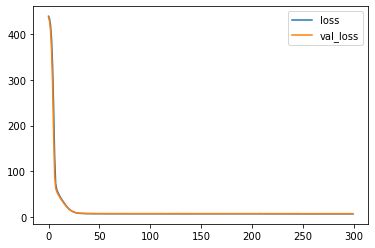

In [408]:
loss_df = pd.DataFrame(losses.history)

# history stores the loss/val
# loss in each epoch

# loss_df is a dataframe which
# contains the losses so we can
# plot it to visualize our model training
loss_df.loc[:,['loss','val_loss']].plot()


In [409]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))

print_metrics(y_test,pred, 4)

Mean Square Error      = 2514.614150434862
Root Mean Square Error = 50.14592855292304
Mean Absolute Error    = 7.430501712962767
Median Absolute Error  = 0.869293212890625
R^2                    = 0.005550881444215006
Adjusted R^2           = 0.00392684913301884


In [416]:
y_pred_r.shape

(1841,)

In [415]:
y_test.shape

(1841,)